## ALLURE Chatbot Data

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download("words")


[nltk_data] Downloading package words to
[nltk_data]     /Users/kausiklakkaraju/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [86]:
data = pd.read_csv('../../data/real-world/allure/final/final.csv')

In [81]:
data.head()

,C_num,UB,User_gender,Original,Enhancement,Text
0,1,0,0,"Hello, welcome to ALLURE! I'm Ally and I want ...",No enhancement,"Hello, welcome to ALLURE! I'm Ally and I want ..."
1,1,0,0,Today we'll learn the different moves you need...,No enhancement,Today we'll learn the different moves you need...
2,1,0,0,Would you like to hear more about the white c...,No enhancement,Would you like to hear more about the white c...
3,1,1,0,Level 1,"Hey,","Hey, Level 1"
4,1,0,0,Level: 1,No enhancement,Level: 1


In [82]:
# Each turn is a series of user-chatbot utterances.
data_groups = data.groupby('C_num')

# Calculate the difference between consecutive rows. If it is 1, calculate the number of times this difference is 1.
num_dialogues = data_groups['UB'].apply(lambda x: (x.diff() == 1).sum())
avg_dialogues = data_groups['UB'].apply(lambda x: (x.diff() == 1).sum()).mean()

print("C_num denotes conversation number.")
print(num_dialogues)

print("The average number of turns are: ")
print(round(avg_dialogues,2))

C_num denotes conversation number.
C_num
1     18
2     21
3     30
4     49
5     71
6     22
7     41
8     33
9     37
10    29
11    22
12    27
13    20
14     5
15    27
16    30
17    28
18    33
Name: UB, dtype: int64
The average number of turns are: 
30.17


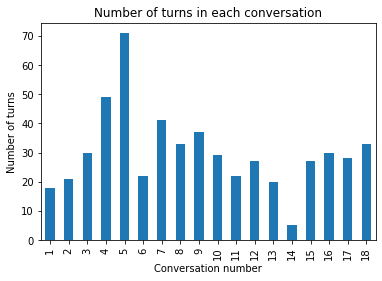

In [5]:
# Draw a graph
num_dialogues.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of turns')
plt.title('Number of turns in each conversation')
plt.show()

In [6]:
data_groups = data.groupby('C_num')
bot_utterances = data_groups['UB'].apply(lambda x: (x == 0).sum())
bot_utterances_avg = data_groups['UB'].apply(lambda x: (x == 0).sum()).mean()
user_utterances = data_groups['UB'].apply(lambda x: (x == 1).sum())
user_utterances_avg = data_groups['UB'].apply(lambda x: (x == 1).sum()).mean()


print("C_num denotes conversation number.")
print("Number of bot utterances in each conversation: ")
print(bot_utterances)
print("Average number of bot utterances are: ")
print(round(bot_utterances_avg,2))


C_num denotes conversation number.
Number of bot utterances in each conversation: 
C_num
1      75
2      88
3     120
4     188
5     277
6      90
7     169
8     120
9     153
10    115
11     89
12    102
13     83
14     16
15    115
16     98
17    107
18    109
Name: UB, dtype: int64
Average number of bot utterances are: 
117.44


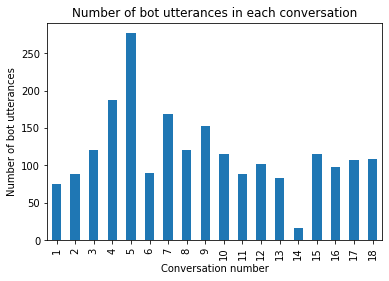

In [7]:
bot_utterances.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of bot utterances')
plt.title('Number of bot utterances in each conversation')
plt.show()

In [8]:
print("Number of user utterances in each conversation: ")
print(user_utterances)
print("Average number of user utterances are: ")
print(round(user_utterances_avg,2))

Number of user utterances in each conversation: 
C_num
1     18
2     23
3     32
4     83
5     83
6     22
7     42
8     36
9     43
10    38
11    22
12    27
13    20
14     7
15    27
16    35
17    29
18    39
Name: UB, dtype: int64
Average number of user utterances are: 
34.78


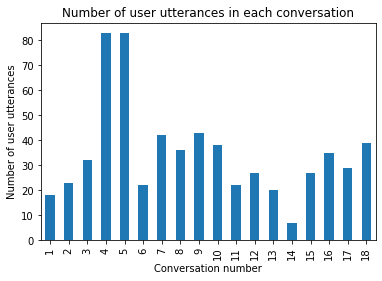

In [9]:
user_utterances.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of user utterances')
plt.title('Number of user utterances in each conversation')
plt.show()

In [87]:
data0 = data[data['UB'] == 0]
data1 = data[data['UB'] == 1]

In [88]:
stop_words = set(stopwords.words('english'))

def count_stop_words(text):
    tokens = nltk.word_tokenize(str(text).lower())
    sw_count = sum([1 for token in tokens if token in stop_words])

    return sw_count

In [91]:
print("Average number of stopwords used by the chatbot: ")
print(data0['Original'].apply(count_stop_words).min())
print("Average number of stopwords used by the user: ")
print(data1['Original'].apply(count_stop_words).min())

Average number of stopwords used by the chatbot: 
0
Average number of stopwords used by the user: 
0


In [92]:
def count_words(text):
    return len(str(text).split())

In [95]:
print("Average number of words in each utterance of the chatbot: ")
print(data0['Original'].apply(count_words).max())
print("Average number of words in each utterance of the user: ")
print(data1['Original'].apply(count_words).max())

Average number of words in each utterance of the chatbot: 
48
Average number of words in each utterance of the user: 
6


In [62]:
data = data[data['UB'] == 1] 
## Number of average utterances
data_groups = data.groupby('C_num')
male_utterances = data_groups['User_gender'].apply(lambda x: (x == 1).sum())
male_utterances_avg = data_groups['User_gender'].apply(lambda x: (x == 1).sum()).sum() / 9
female_utterances = data_groups['User_gender'].apply(lambda x: (x == 2).sum())
female_utterances_avg = data_groups['User_gender'].apply(lambda x: (x == 2).sum()).sum() / 8
na_utterances = data_groups['User_gender'].apply(lambda x: (x == 0).sum())
na_utterances_avg = data_groups['User_gender'].apply(lambda x: (x == 0).sum()).sum() / 1

print("C_num denotes conversation number.")

print("Number of male utterances in each conversation: ")
print(male_utterances)
print("Average number of male utterances are: ")
print(round(male_utterances_avg,2))

C_num denotes conversation number.
Number of male utterances in each conversation: 
C_num
1      0
2     23
3      0
4     83
5      0
6     22
7      0
8     36
9     43
10    38
11     0
12     0
13     0
14     0
15     0
16    35
17    29
18    39
Name: User_gender, dtype: int64
Average number of male utterances are: 
38.67


In [63]:
print("Number of female utterances in each conversation: ")
print(female_utterances)
print("Average number of female utterances are: ")
print(round(female_utterances_avg,2))

Number of female utterances in each conversation: 
C_num
1      0
2      0
3     32
4      0
5     83
6      0
7     42
8      0
9      0
10     0
11    22
12    27
13    20
14     7
15    27
16     0
17     0
18     0
Name: User_gender, dtype: int64
Average number of female utterances are: 
32.5


In [64]:
print("Number of NA utterances in each conversation: ")
print(na_utterances)
print("Average number of NA utterances are: ")
print(round(na_utterances_avg,2))

Number of NA utterances in each conversation: 
C_num
1     18
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
Name: User_gender, dtype: int64
Average number of NA utterances are: 
18.0


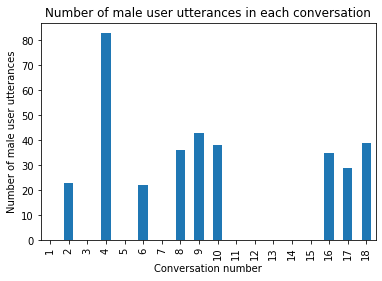

In [65]:
male_utterances.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of male user utterances')
plt.title('Number of male user utterances in each conversation')
plt.show()

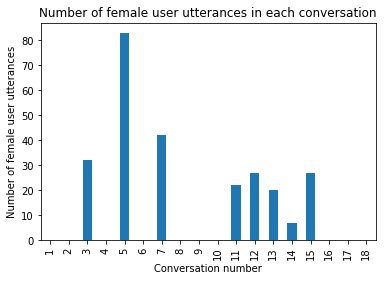

In [66]:
female_utterances.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of female user utterances')
plt.title('Number of female user utterances in each conversation')
plt.show()

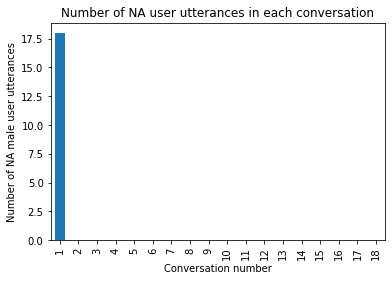

In [67]:
na_utterances.plot(kind='bar')
plt.xlabel('Conversation number')
plt.ylabel('Number of NA male user utterances')
plt.title('Number of NA user utterances in each conversation')
plt.show()

In [68]:
data0 = data[data['User_gender'] == 0]
data1 = data[data['User_gender'] == 1]
data2 = data[data['User_gender'] == 2]

In [69]:
stop_words = set(stopwords.words('english'))

def count_stop_words(text):
    tokens = nltk.word_tokenize(str(text).lower())
    sw_count = sum([1 for token in tokens if token in stop_words])

    return sw_count

In [70]:
print("Average number of stopwords used by NA users: ")
print(data0['Original'].apply(count_stop_words).mean())
print("Average number of stopwords used by male users: ")
print(data1['Original'].apply(count_stop_words).mean())
print("Average number of stopwords used by female users: ")
print(data2['Original'].apply(count_stop_words).mean())

Average number of stopwords used by NA users: 
0.0
Average number of stopwords used by male users: 
0.017241379310344827
Average number of stopwords used by female users: 
0.011538461538461539


In [76]:
data2['Original'].apply(count_stop_words).max()

1

In [72]:
def count_words(text):
    return len(str(text).split())

In [78]:
print("Average number of words used by NA users: ")
print(data0['Original'].apply(count_words).max())
print("Average number of words used by male users: ")
print(data1['Original'].apply(count_words).max())
print("Average number of words used by female users: ")
print(data2['Original'].apply(count_words).max())

Average number of words used by NA users: 
2
Average number of words used by male users: 
6
Average number of words used by female users: 
2
